# Visualizing Time Series Data in Python

Time series data is omnipresent in the field of Data Science. Whether it is analyzing business trends, forecasting company revenue or exploring customer behavior, every data scientist is likely to encounter time series data at some point during their work. To get you started on working with time series data, this notebook will provide practical knowledge on visualizing time series data using Python.

## Table of Contents

- [Introduction](#intro)
- [Summary Statistics and Diagnostics](#sum)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/dc28/"

---
<a id='intro'></a>

## Introduction

## Load your time series data

The most common way to import time series data in Python is by using the pandas library. You can use the `read_csv()` from pandas to read the contents of a file into a DataFrame. This can be achieved using the following command: `df = pd.read_csv("name_of_your_file.csv")`.

Once your data is loaded into Python, you can display the first rows of your DataFrame by calling the `.head(n=5)` method, where n=5 indicates that you want to print the first five rows of your DataFrame.

In this exercise, you will read in a time series dataset that contains the number of "great" inventions and scientific discoveries from 1860 to 1959, and display its first five rows.

In [2]:
# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv(path+'ch1_discoveries.csv')

# Display the first five lines of the DataFrame
print(discoveries.head())

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


## Test whether your data is of the correct type

When working with time series data in pandas, any date information should be formatted as a `datetime64` type. Therefore, it is important to check that the columns containing the date information are of the correct type. You can check the type of each column in a DataFrame by using the `.dtypes` attribute. Fortunately, if your date columns come as strings, epochs, etc... you can use the `to_datetime()` function to convert them to the appropriate datetime64 type: `df['date_column'] = pd.to_datetime(df['date_column'])`.

In this exercise, you will learn how to check the data type of the columns in your time series data and convert a date column to the appropriate datetime type.

In [3]:
# Print the data type of each column in discoveries
print(discoveries.dtypes)

# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries['date'])

# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    object
Y        int64
dtype: object
date    datetime64[ns]
Y                int64
dtype: object


## Your first plot!

Let's take everything you have learned so far and plot your first time series plot. You will set the groundwork by producing a time series plot of your data and labeling the axes of your plot, as this makes the plot more readable and interpretable for the intended audience.

matplotlib is the most widely used plotting library in Python, and would be the most appropriate tool for this job. Fortunately for us, the pandas library has implemented a `.plot()` method on Series and DataFrame objects that is a wrapper around `matplotlib.pyplot.plot()`, which makes it easier to produce plots.

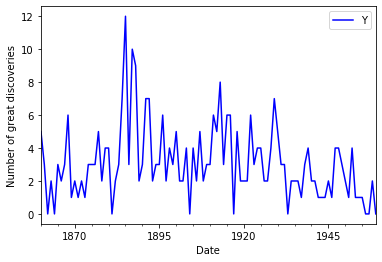

In [4]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show();

## Specify plot styles

The matplotlib library also comes with a number of built-in stylesheets that allow you to customize the appearance of your plots. To use a particular style sheet for your plots, you can use the command `plt.style.use(your_stylesheet)` where your_stylesheet is the name of the style sheet.

In order to see the list of available style sheets that can be used, you can use the command `print(plt.style.available)`. For the rest of this course, we will use the awesome fivethirtyeight style sheet.

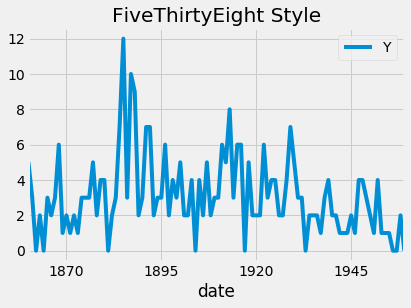

In [5]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show();

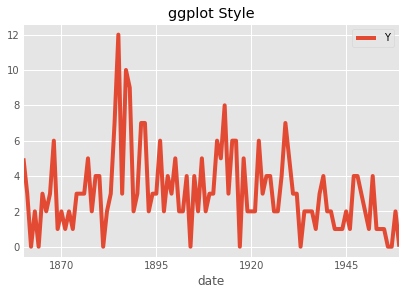

In [6]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show();

## Display and label plots

As you saw earlier, if the index of a pandas DataFrame consists of dates, then pandas will automatically format the x-axis in a human-readable way. In addition the `.plot()` method allows you to specify various other parameters to tailor your time series plot (color of the lines, width of the lines and figure size).

You may have noticed the use of the notation `ax = df.plot(...)` and wondered about the purpose of the `ax` object. This is because the plot function returns a matplotlib `AxesSubplot` object, and it is common practice to assign this returned object to a variable called `ax`. Doing so also allows you to include additional notations and specifications to your plot such as axis labels.

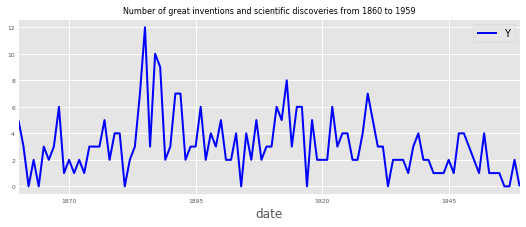

In [7]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show();

## Subset time series data

When plotting time series data, you may occasionally want to visualize only a subset of the data. The pandas library provides powerful indexing and subsetting methods that allow you to extract specific portions of a DataFrame. For example, you can subset all the data between 1950 and 1960 in the discoveries DataFrame by specifying the following date range: `subset_data = discoveries['1950-01-01':'1960-01-01']`.

Note: Subsetting your data this way is only possible if the index of your DataFrame contains dates of the datetime type. Failing that, the pandas library will return an error message.

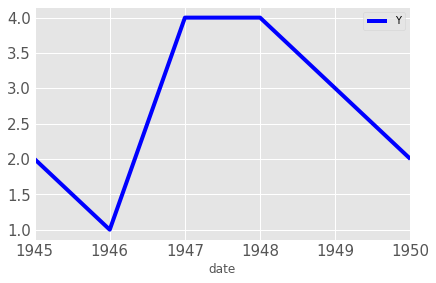

In [8]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945-01-01':'1950-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15)

# Show plot
plt.show();

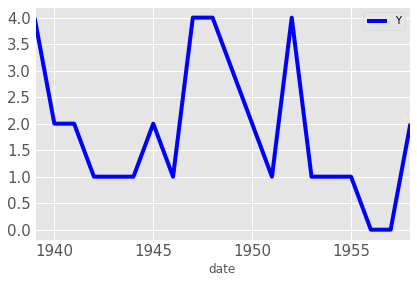

In [9]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939-01-01':'1958-01-01']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show();

## Add vertical and horizontal markers

Additional annotations can help further emphasize specific observations or events. Here, you will learn how to highlight significant events by adding markers at specific timestamps of your time series plot. The matplotlib library makes it possible to draw vertical and horizontal lines to identify particular dates.

Recall that the index of the discoveries DataFrame are of the datetime type, so the x-axis values of a plot will also contain dates, and it is possible to directly input a date when annotating your plots with vertical lines. For example, a vertical line at January 1, 1945 can be added to your plot by using the command: `ax.axvline('1945-01-01', linestyle='--')`.

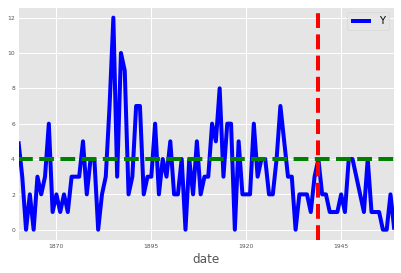

In [10]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--')

plt.show();

## Add shaded regions to your plot

When plotting time series data in Python, it is also possible to highlight complete regions of your time series plot. In order to add a shaded region between January 1, 1936 and January 1, 1950, you can use the command: `ax.axvspan('1936-01-01', '1950-01-01', color='red' , alpha=0.5)`.

Here we specified the overall transparency of the region by using the alpha argument (where 0 is completely transparent and 1 is full color).

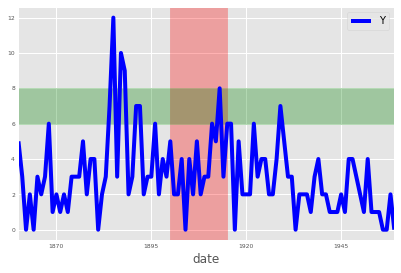

In [11]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show();

---
<a id='sum'></a>

# Summary Statistics and Diagnostics

## Find missing values

In the field of Data Science, it is common to encounter datasets with missing values. This is especially true in the case of time series data, where missing values can occur if a measurement fails to record the value at a specific timestamp. To count the number of missing values in a DataFrame called df that contains time series data, you can use the command: `missing_values = df.isnull().sum()`.

In this exercise, you will learn how to find whether your data contains any missing values.

In [12]:
# Read in the file content in a DataFrame called discoveries
co2_levels = pd.read_csv(path+'ch2_co2_levels.csv')

# Display the first five lines of the DataFrame
print(co2_levels.head(8))

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4
5  1958-05-03  316.9
6  1958-05-10    NaN
7  1958-05-17  317.5


In [13]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


It looks like the co2_levels DataFrame contains missing values, let's see how we can handle those!

---
<a id='intro'></a>

<img src="images/ts2_001.png" alt="" style="width: 400px;"/>